In [1]:
!pip install opencv-python


In [4]:
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
IMAGE_DIR=r"C:\Users\reyha\Desktop\DATA SCIENCE CLASS ITALY\computer vision project\localization1\localization\dataset\images"

In [6]:
ANNOTATIONS_DIR=r"C:\Users\reyha\Desktop\DATA SCIENCE CLASS ITALY\computer vision project\localization1\localization\dataset\annotations"

In [7]:
class_names=[d for d in os.listdir(IMAGE_DIR) if os.path.isdir(os.path.join(IMAGE_DIR,d))]

In [8]:
csv_files = [f for f in os.listdir(ANNOTATIONS_DIR) if f.endswith(".csv")]


In [9]:
csv_files

['airplane.csv', 'face.csv', 'motorcycle.csv']

In [10]:
class_names

['airplane', 'face', 'motorcycle']

In [61]:
images=[]
lables=[]
annotations=[]

for i in range(len(class_names)):
    class_name=class_names[i]
    class_dir=os.path.join(IMAGE_DIR,class_name)
    csv_files_name=csv_files[i]
    csv_path=os.path.join(ANNOTATIONS_DIR,csv_files_name)
    df=pd.read_csv(csv_path)
    
    for image_name in os.listdir(class_dir):
        image_path=os.path.join(class_dir,image_name)
        image=cv2.imread(image_path)
        h,w,_=image.shape
        ann=df[df["image_name"]==image_name].iloc[0,1:].tolist()

        ann[0]=ann[0]/w
        ann[1]=ann[1]/h
        ann[2]=ann[2]/w
        ann[3]=ann[3]/h

        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image=cv2.resize(image,(224,224))
        images.append(image)
        lables.append([class_names.index(class_name)])
        annotations.append([ann])

In [12]:
lables=np.array(lables)
annotations=np.array(annotations)
images=np.array(images)

In [13]:
images.dtype

dtype('uint8')

In [14]:
lables.dtype

dtype('int32')

In [15]:
annotations.dtype

dtype('float64')

In [16]:
images.shape

(2033, 224, 224, 3)

In [17]:
lables.shape

(2033, 1)

In [18]:
annotations.shape

(2033, 1, 4)

In [19]:
annotations.min()

0.0057306590257879654

In [20]:
annotations.max()

0.9941860465116279

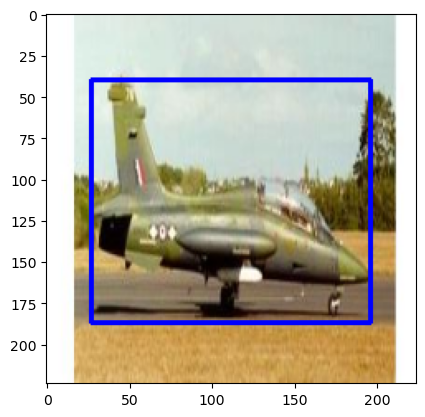

In [21]:
i=0
img=images[i]
bbx=(annotations[i][0]*224).astype(int)
img_ann=cv2.rectangle(img.copy(),bbx[:2],bbx[2:],color=(0,0,255),thickness=2)
plt.imshow(img_ann)

In [20]:
!pip install tensorflow


  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl (15.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\reyha\\anaconda3\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [21]:
!pip install numpy==1.24.3


  Using cached numpy-1.24.3-cp39-cp39-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [22]:
import tensorflow as tf
import numpy as np

print("TensorFlow version:", tf.__version__)
print("NumPy version:", np.__version__)


TensorFlow version: 2.19.0
NumPy version: 1.24.4


In [23]:
import keras
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dropout, Dense, Input, MaxPooling2D, Conv2D
from tensorflow.keras.models import Model

In [24]:
keras.__version__

'3.9.2'

In [25]:
input_model=Input(shape=(224,224,3),name="input_layer")

In [26]:
conv=Conv2D(filters=32,kernel_size=(3,3),strides=1,padding="same",activation="relu")(input_model)
conv=MaxPooling2D()(conv)
conv=Conv2D(filters=64,kernel_size=(3,3),strides=1,padding="same",activation="relu")(conv)
conv=MaxPooling2D()(conv)
conv=Conv2D(filters=128,kernel_size=(3,3),strides=1,padding="same",activation="relu")(conv)
conv=MaxPooling2D()(conv)
conv=Conv2D(filters=256,kernel_size=(3,3),strides=1,padding="same",activation="relu")(conv)
conv=MaxPooling2D()(conv)
conv=Conv2D(filters=512,kernel_size=(3,3),strides=1,padding="same",activation="relu")(conv)
conv=MaxPooling2D()(conv)

In [27]:
flatten=Flatten()(conv)

In [28]:
clf=Dense(128,activation="relu")(flatten)
clf=Dropout(0.5)(clf)
clf=Dense(3,activation="softmax",name="class")(clf)

In [29]:
bbox=Dense(128,activation="relu")(flatten)
bbox=Dropout(0.5)(bbox)
bbox=Dense(4,activation="sigmoid",name="bbox")(bbox)

In [30]:
model=Model(inputs=input_model,outputs=(clf,bbox))

In [31]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 224, 224,  │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 112, 112,  │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 112, 112,  │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 56, 56,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 56, 56,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 28, 28,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 28, 28,    │    295,168 │ max_pooling2d_2[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 14, 14,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 14, 14,    │  1,180,160 │ max_pooling2d_3[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 7, 7, 512) │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 25088)     │          0 │ max_pooling2d_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │  3,211,392 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │  3,211,392 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ class (Dense)       │ (None, 3)         │        387 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bbox (Dense)        │ (None, 4)         │        516 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,992,263 (30.49 MB)

 Trainable params: 7,992,263 (30.49 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


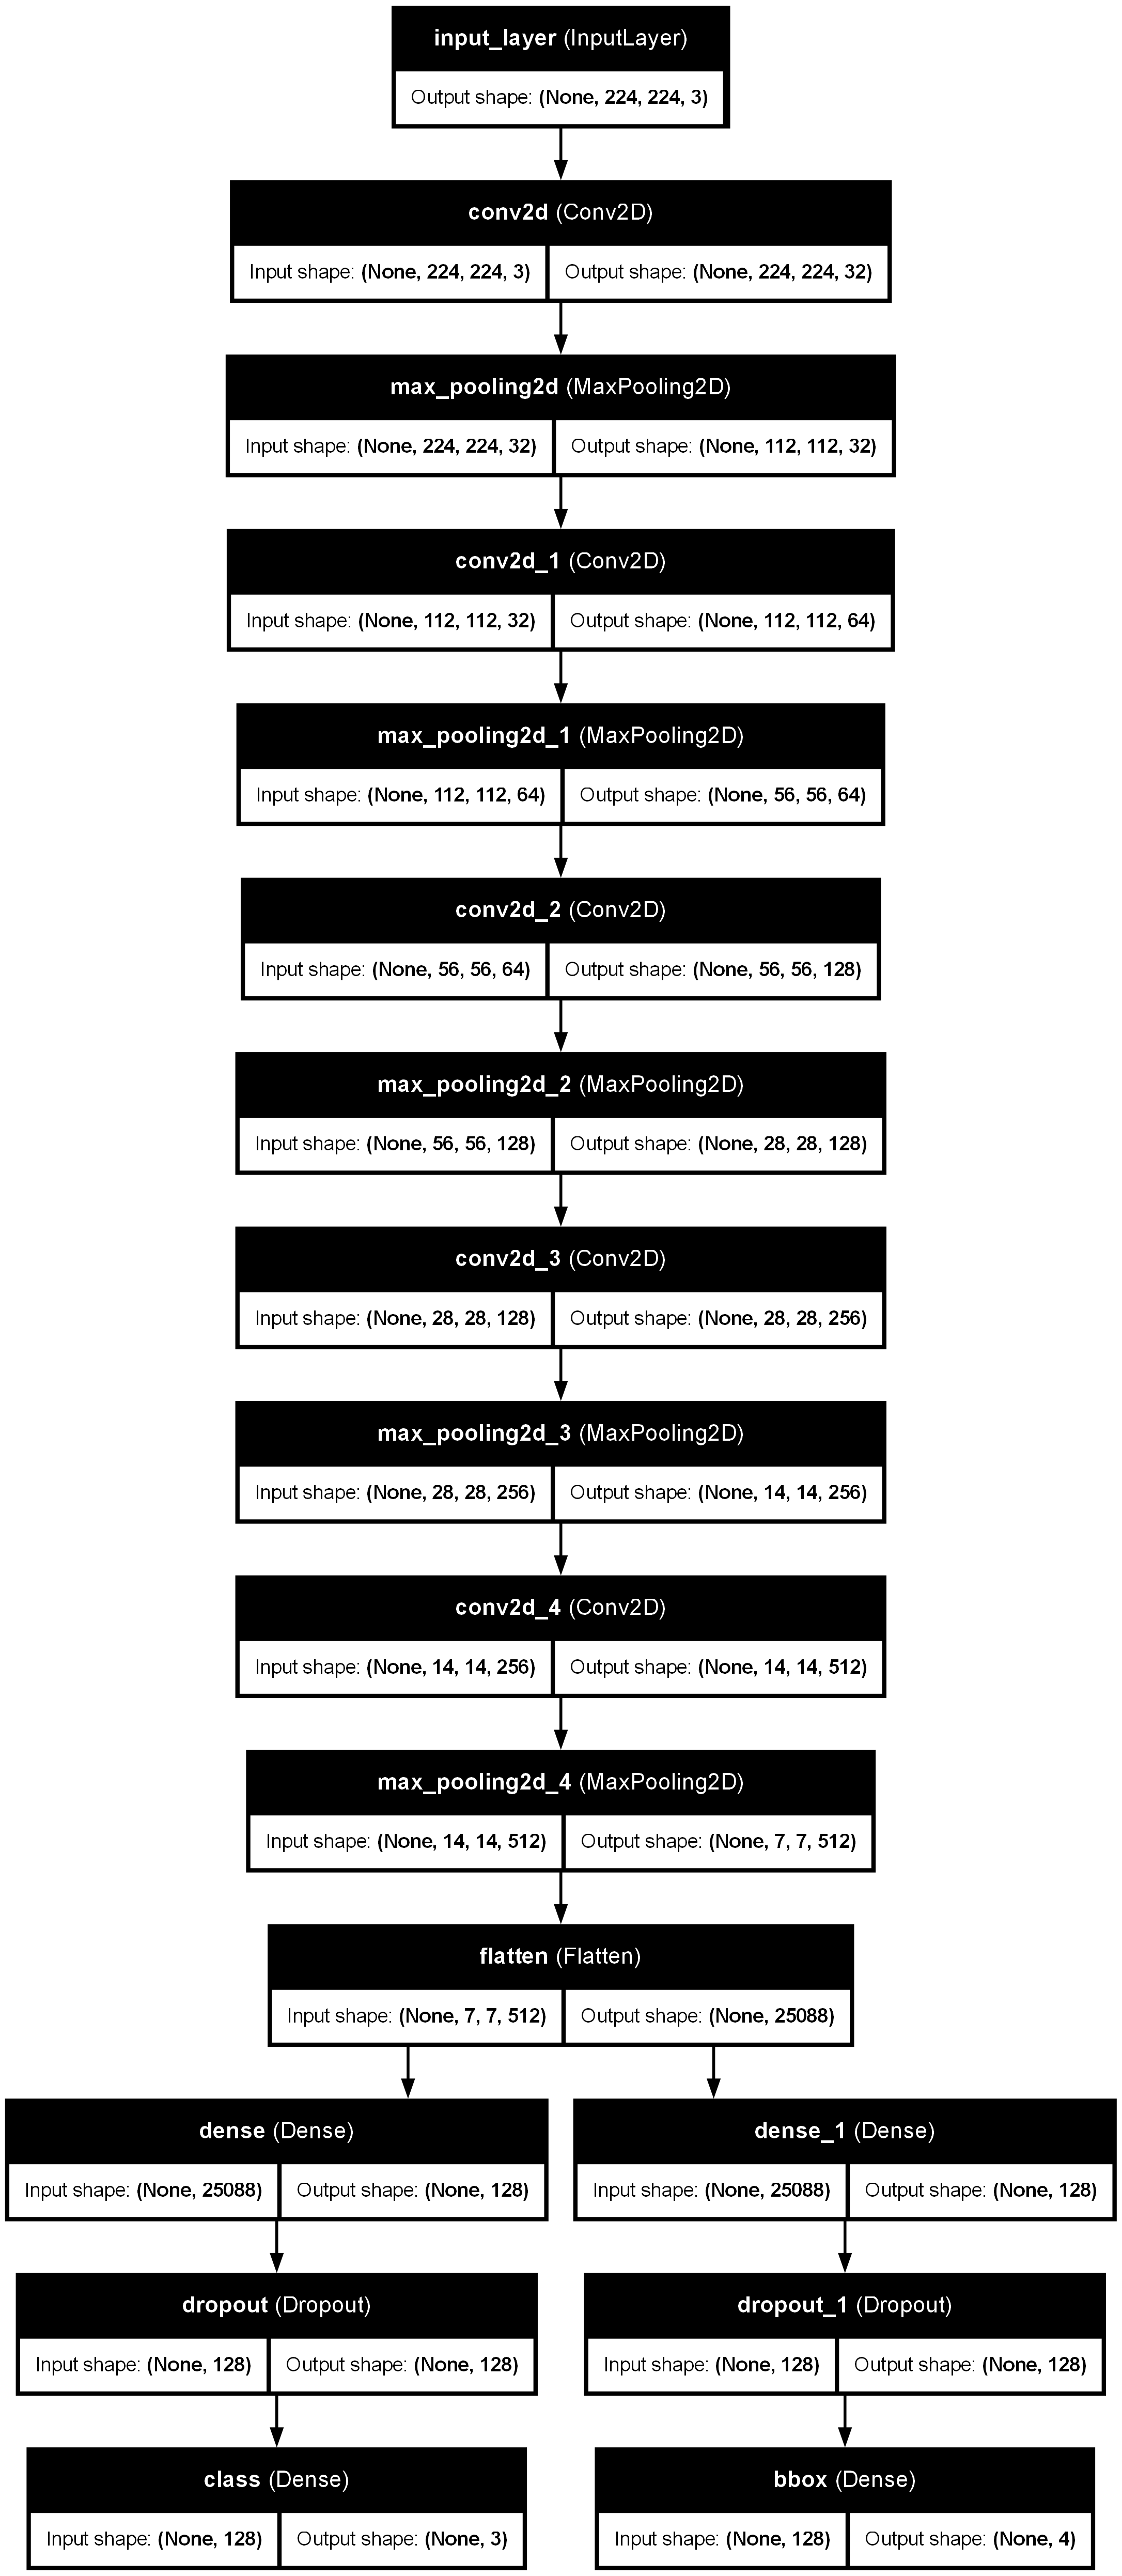

In [32]:
from tensorflow.keras.utils import plot_model
plot_model(
     model,
     to_file="model.png",
     show_shapes=True,
     show_layer_names=True,
     )

In [33]:
opt = tf.optimizers.Adam(learning_rate=0.001)

loss = {
    "class": tf.losses.SparseCategoricalCrossentropy(),
    "bbox": tf.losses.MeanSquaredError()
}

loss_weights = {
    "class": 1.0,
    "bbox": 1.0
}

metrics = {
    "class": tf.metrics.SparseCategoricalAccuracy(),
    "bbox": tf.metrics.MeanSquaredError()
}

model.compile(optimizer=opt, loss=loss, metrics=metrics, loss_weights=loss_weights)


In [35]:
callbacks=[keras.callbacks.ModelCheckpoint(filepath="best_model.keras",monitor="val_loss"),
          keras.callbacks.ReduceLROnPlateau(monitor="val_loss",factor=0.1,patience=12)]

In [36]:
images.max()

255

In [43]:
X_train=images/225
y_train=[lables,annotations]
history=model.fit(X_train,y_train,batch_size=32,epochs=100,validation_split=0.15,verbose=1,callbacks=callbacks)

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 175s 3s/step - bbox_loss: 0.0357 - bbox_mean_squared_error: 0.0357 - class_loss: 0.9504 - class_sparse_categorical_accuracy: 0.4884 - loss: 0.9861 - val_bbox_loss: 0.0262 - val_bbox_mean_squared_error: 0.0261 - val_class_loss: 0.1028 - val_class_sparse_categorical_accuracy: 0.9869 - val_loss: 0.1275 - learning_rate: 0.0010
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 154s 3s/step - bbox_loss: 0.0192 - bbox_mean_squared_error: 0.0192 - class_loss: 0.2523 - class_sparse_categorical_accuracy: 0.8991 - loss: 0.2716 - val_bbox_loss: 0.0061 - val_bbox_mean_squared_error: 0.0062 - val_class_loss: 0.0030 - val_class_sparse_categorical_accuracy: 1.0000 - val_loss: 0.0093 - learning_rate: 0.0010
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 160s 3s/step - bbox_loss: 0.0162 - bbox_mean_squared_error: 0.0162 - class_loss: 0.0934 - class_sparse_categorical_accuracy: 0.9675 - loss: 0.1096 - val_bbox_loss: 0.0117 - val_bbox_mean_squared_error: 0.0116 - val_class_loss: 9.5475

In [44]:
history.history

{'bbox_loss': [0.02861156314611435,
  0.018270114436745644,
  0.0156529750674963,
  0.015582196414470673,
  0.014262620359659195,
  0.012548241764307022,
  0.012173473834991455,
  0.011394144967198372,
  0.011531668715178967,
  0.010750014334917068,
  0.010677299462258816,
  0.010075085796415806,
  0.01067703403532505,
  0.011999188922345638,
  0.009833043441176414,
  0.011074178852140903,
  0.010051353834569454,
  0.00919706653803587,
  0.009144514799118042,
  0.008785958401858807,
  0.008927245624363422,
  0.00852329283952713,
  0.008267526514828205,
  0.008210685104131699,
  0.007947105914354324,
  0.00810780469328165,
  0.007916327565908432,
  0.007986260578036308,
  0.007999640889465809,
  0.007997112348675728,
  0.007973778992891312,
  0.00781942531466484,
  0.00775008462369442,
  0.007821675390005112,
  0.0079215532168746,
  0.0080775897949934,
  0.007748451549559832,
  0.007915429770946503,
  0.007758461404591799,
  0.007773281075060368,
  0.007867802865803242,
  0.007820208556

In [45]:
history.history.keys()

dict_keys(['bbox_loss', 'bbox_mean_squared_error', 'class_loss', 'class_sparse_categorical_accuracy', 'loss', 'val_bbox_loss', 'val_bbox_mean_squared_error', 'val_class_loss', 'val_class_sparse_categorical_accuracy', 'val_loss', 'learning_rate'])

In [47]:
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

class_loss = history.history["class_loss"]
val_class_loss = history.history["val_class_loss"]

bbox_loss = history.history["bbox_loss"]
val_bbox_loss = history.history["val_bbox_loss"]

train_class_accuracy = history.history["class_sparse_categorical_accuracy"]
val_class_accuracy = history.history["val_class_sparse_categorical_accuracy"]

epochs = len(train_loss)


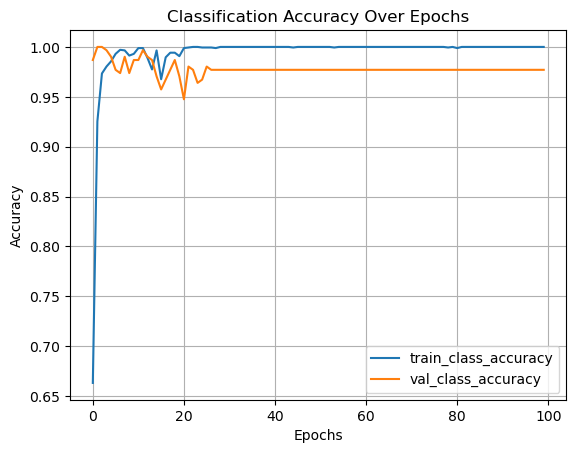

In [49]:
import matplotlib.pyplot as plt

plt.plot(train_class_accuracy, label="train_class_accuracy")
plt.plot(val_class_accuracy, label="val_class_accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Classification Accuracy Over Epochs")
plt.legend()
plt.grid(True)
plt.show()


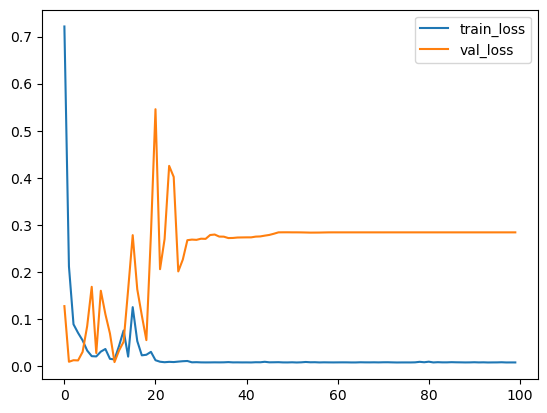

In [51]:
plt.plot(train_loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend()
plt.show()

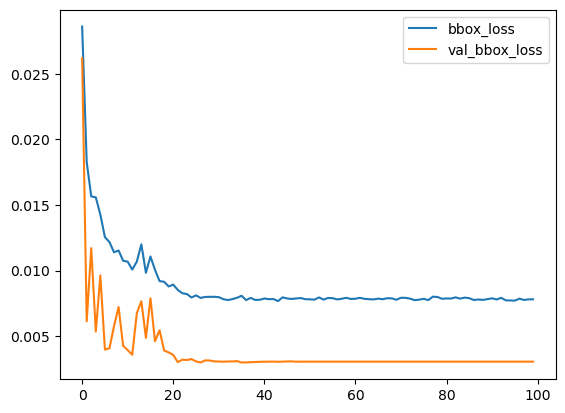

In [53]:
plt.plot(bbox_loss, label="bbox_loss")
plt.plot(val_bbox_loss, label="val_bbox_loss")
plt.legend()
plt.show()

In [54]:
model=keras.saving.load_model("best_model.keras")


In [82]:
import cv2
import tensorflow as tf
image_path=r"C:\Users\reyha\Desktop\DATA SCIENCE CLASS ITALY\computer vision project\localization1\localization\test\leo.jpg"
image=cv2.imread(image_path)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224))
X=tf.expand_dims(image,axis=0)/255

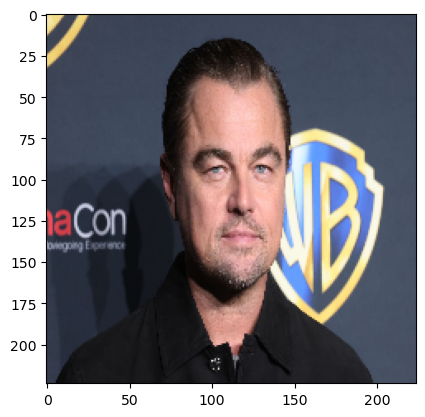

In [83]:
plt.imshow(image)
plt.show()

In [84]:
X.shape

TensorShape([1, 224, 224, 3])

In [85]:
class_pred,bbox_pred=model.predict(X)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


In [86]:
class_pred_lable=class_names[class_pred.argmax()]

In [87]:
class_pred_lable

'face'

In [88]:
bbox_pred=(bbox_pred*224).astype("int")

In [89]:
bbox_pred

array([[ 42,  35, 183, 184]])

In [75]:
card1=bbox_pred[0][:2]
card2=bbox_pred[0][2:]

In [76]:
bbox_pred

array([[ 42,  35, 183, 184]])

In [90]:
img_test_bbox = cv2.rectangle(image, card1, card2, color=(0, 0, 255), thickness=2)
img_test_bbox = cv2.putText(img_test_bbox, class_pred_lable, card1, cv2.FONT_HERSHEY_COMPLEX, 0.6, (0, 0, 255))


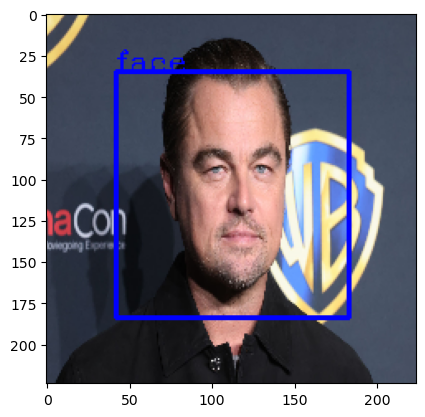

In [91]:
plt.imshow(img_test_bbox)